#### Feature Details :
###### SNo - Serial number.
###### Date - Date of funding in format DD/MM/YYYY.
###### StartupName - Name of the startup which got funded.
###### IndustryVertical - Industry to which the startup belongs.
###### SubVertical - Sub-category of the industry type.
###### CityLocation - City which the startup is based out of.
###### InvestorsName - Name of the investors involved in the funding round.
###### InvestmentType - Either Private Equity or Seed Funding.
###### AmountInUSD - Funding Amount in USD.
###### Remarks - Other information, if any.

#### Insights -
###### Find out what type of startups are getting funded in the last few years?
###### Who are the important investors?
###### What are the hot fields that get a lot of funding these days?

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

Problem Statement :
Check the trend of investments over the years. To check
the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings.
Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years
in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to
handle that.

In [37]:
df = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


{2020: 7, 2019: 111, 2018: 309, 2017: 693, 2016: 993, 2015: 930, 15: 1}


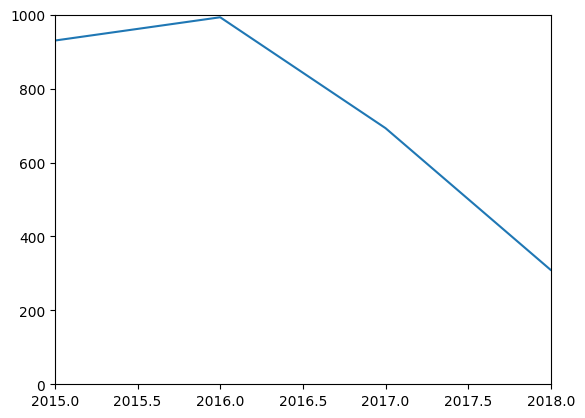

In [54]:
year = df['Date dd/mm/yyyy'].str.split('/').str[2]
year = year.replace("",2017)
year = year.astype(float).fillna('2017')
year = year.astype('int64')

dict = {}
for i in range(0,len(year)):
    if year[i] in dict:
        dict[year[i]] += 1
    else:
        dict[year[i]] = 1
print(dict)

yr = dict.keys()
gain = dict.values()

plt.plot(yr,gain)
plt.axis([2015,2018,0,1000])
plt.show()

Problem Statement :
Find out which cities are generally chosen for starting a
startup.

Find top 10 Indian cities which have most number of
startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city
also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means -
at some place, instead of "Bangalore", "bangalore" is
given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian
and one Foreign. Count those startups in Indian startup
also. Indian city name is first.

Print the city in descending order with respect to the
number of startups.

In [2]:
df1 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df1.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


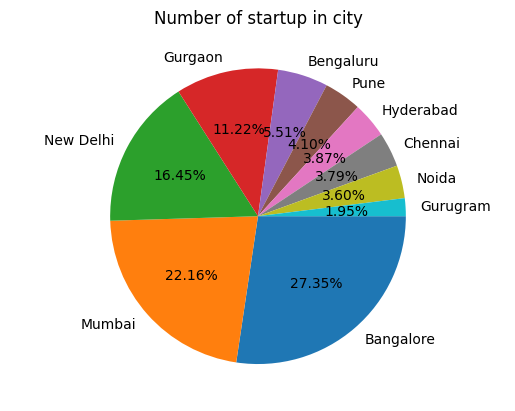

In [10]:
df1['City  Location'].replace('Delhi','New Delhi')
df1.head(1)
city = df1['City  Location'].value_counts()
city.head(10)
Location = []
Count = []
for i in range(0,10):
    Location.append(city.index[i])
    Count.append(city.values[i])
Location = np.array(Location)
Count = np.array(Count)
# plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.pie(Count,labels=Location,autopct="%.2f%%",counterclock=False)
plt.show()

Problem Statement :
Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings
received. Find out percentage of funding each city has got
(among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after
rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means -
at some place, instead of "Bangalore", "bangalore" is
given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian
and one Foreign. Count those startups in Indian startup
also. Indian city name is first.

Print the city in descending order with respect to the
percentage of funding.

In [89]:
df2 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
# df2.sort_values(by='Amount in USD',ascending=False)
df2.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [91]:
# Use replace with regex = True Determines if the passed-in pattern is a regular expression:
# If True, assumes the passed-in pattern is a regular expression.
# If False, treats the pattern as a literal string
# Cannot be set to False if pat is a compiled regex or repl is a callable.

df2['Amount in USD'] = df2['Amount in USD'].replace(",","",regex=True)
print(df2['Amount in USD'])

df2['Amount in USD'] = df2['Amount in USD'].replace(np.nan, '0')
df2['Amount in USD'] = df2['Amount in USD'].replace('undisclosed', '0')
df2['Amount in USD'] = df2['Amount in USD'].replace('Undisclosed', '0')
df2['Amount in USD'] = df2['Amount in USD'].str.extract('(\d+)', expand=False)

df2['Amount in USD'] = df2['Amount in USD'].astype(float).astype(int)
print(df2['Amount in USD'])


# df2['City  Location'] = df2['City  Location'].replace('bengaluru',"Bengaluru")
# df2['City  Location'] = df2['City  Location'].replace('Delhi',"New Delhi")
# Amount = df2['Amount in USD']
# Amount

0       200000000
1         8048394
2        18358860
3         3000000
4         1800000
          ...    
3039      4500000
3040       825000
3041      1500000
3042            0
3043       140000
Name: Amount in USD, Length: 3044, dtype: object
0       200000000
1         8048394
2        18358860
3         3000000
4         1800000
          ...    
3039      4500000
3040       825000
3041      1500000
3042            0
3043       140000
Name: Amount in USD, Length: 3044, dtype: int32
